In [54]:
import tensorflow as tf

In [76]:
w = tf.Variable(0.0)
x = tf.constant([[1.0], [2.0], [3.0], [4.0], [5.0]])
y = tf.constant([[2.0], [4.0], [6.0], [8.0], [10.0]])

alpha = tf.constant(0.1)

w_c = {}
J = 0

for i in range(20):
    with tf.GradientTape() as gg:
        gg.watch(w)
        y_pred = w * x
        J = tf.reduce_mean((y - y_pred) ** 2)
        
    dJ_dw = gg.gradient(J, w)
    w.assign_sub(alpha * dJ_dw)
    w_c[w.numpy()] = J.numpy()

Text(0.5, 1.0, 'Gradient Discent for predicting w for y = wx to fit given data')

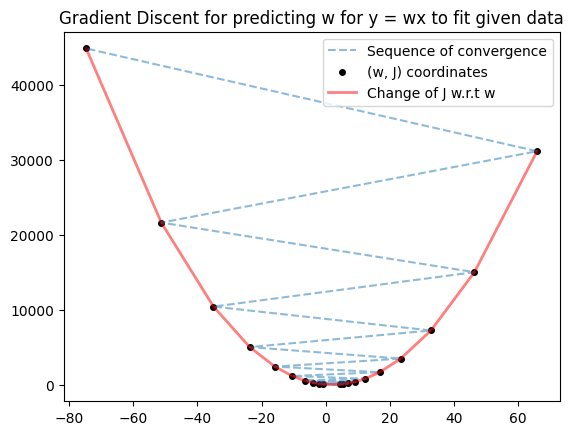

In [78]:
import matplotlib.pyplot as plt

sorted_w_c = {key: w_c[key] for key in sorted(list(w_c.keys()))}

plt.plot(w_c.keys(), w_c.values(), alpha=0.5, linestyle='dashed')
plt.scatter(w_c.keys(), w_c.values(), color='black', marker='.', linewidth=2)
plt.plot(sorted_w_c.keys(), sorted_w_c.values(), alpha=0.5, linewidth=2, color='red', linestyle='solid')
plt.legend(['Sequence of convergence', '(w, J) coordinates', 'Change of J w.r.t w'])
plt.title('Gradient Discent for predicting w for y = wx to fit given data')